## 1. Loss Function

###  Loss Function(손실 함수): 평균 제곱 오차(MSE)


In [1]:
import numpy as np

def mean_squared_error(y, t):
    return 0.5*np.sum((y-t)**2)

In [2]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
true = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 정답과 예측값의 오차를 MSE로 계산
mean_squared_error(np.array(y), np.array(true))

0.09750000000000003

In [3]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(true))

0.5975

- 첫 번째 실험의 MSE 값이 더 작으므로 정답에 가깝다고 판단 가능

### Loss Function(손실 함수): 교차 엔트로피 오차(CEE)
- 정답이 0인 경우는 계산하지 않는다. 


In [4]:
# 정답과 예측값의 오차를 CEE로 계산
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))


In [5]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
true = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

cross_entropy_error(np.array(y), np.array(true))

0.510825457099338

In [9]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(true))

2.302584092994546

### Loss Function(손실 함수): 미니배치 학습

- 배치 학습
    - 훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾아내는 것이 목적
    - 그런데, 위와 같은 방법은 모든 데이터를 대상으로 손실 함수 값을 구해야 함
        - 예) 훈련 데이터가 100개 라면, 100개의 손실 함수의 값들의 합을 지표로 삼았음

    - 즉, 훈련 데이터로부터 일부만 골라서 학습을 수행하는 방법 
    - 이때 일부를 미니배치 라고 함
        - 예: MNIST 데이터의 훈련 데이터인 60,000장 중에서 100장을 무작위로 뽑아서 100장을 사용하여 학습
    

In [13]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

import sys, os
sys.path.append('./mnist_dataset')
import numpy as np
import pickle
from mnist_dataset.mnist import load_mnist
import matplotlib.pylab as plt

In [16]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True,
                                                  one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [19]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [20]:
np.random.choice(60000, 10) # 무작위로 10개 추출

array([44912, 55724, 21259, 20095, 20713, 24107, 49658, 50769, 35742,
       39135])

### Loss Function(손실 함수): 미니배치용 CEE 구현하기
- 미니 배치 학습에 사용하는 교차 엔트로피 오차는 어떻게 구현할까?
    - one-hot encoding
    - label

In [22]:
# one hot encoding용
def cross_entropy_error_one_hot(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)  # 정답 레이블
        y = y.reshape(1, y.size)  # 신경망의 출력
        
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y))

In [23]:
# label용
def cross_entropy_error_label(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size


### Loss Function(손실 함수): 왜 설정해야 하는가?
- 신경망 학습에서 미분의 역할은 ?
    - 최적의 매개변수(가중치, 편향) 탐색 시, 손실 함수의 값을 가장 작게 만드는 매개변수 값을 탐색
    - 매개변수의 미분을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신
    - 미분 값이 0이 되면 매개변수의 갱신 중단

- 정확도의 경우 대부분의 지점에서 미분 값이 0이 되어 매개변수의 갱신이 불가능
    - 정확도는 매개변수의 작은 변화에는 거의 반응이 없다가, 불연속적으로 갑자기 변화
    - 손실 함수를 사용하면 매개변수의 값의 변화에 따라 연속적으로 변화 



## 2. Numerical differentiation

In [ ]:
def numerical_differential(f, x):
    h = 10e-50  # 0과 최대한 가까운 숫자
    return (f(x+h) - f(x)) / h

- h값이 작으면 계산이 힘들어지고 반올림 오차 문제 발생 
     - h= 0.0001이 좋은 결과를 낸다고 알려짐.
- (x+h)와 x 사이의 기울기와 x의 접선의 기울기가 달라 현재 계산 방식에 오차 존대 
    - (x+h)와 (x-h)의 차이를 2h로 나눠서 해결

In [26]:
def numerical_differential(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

- 수치 미분


In [24]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

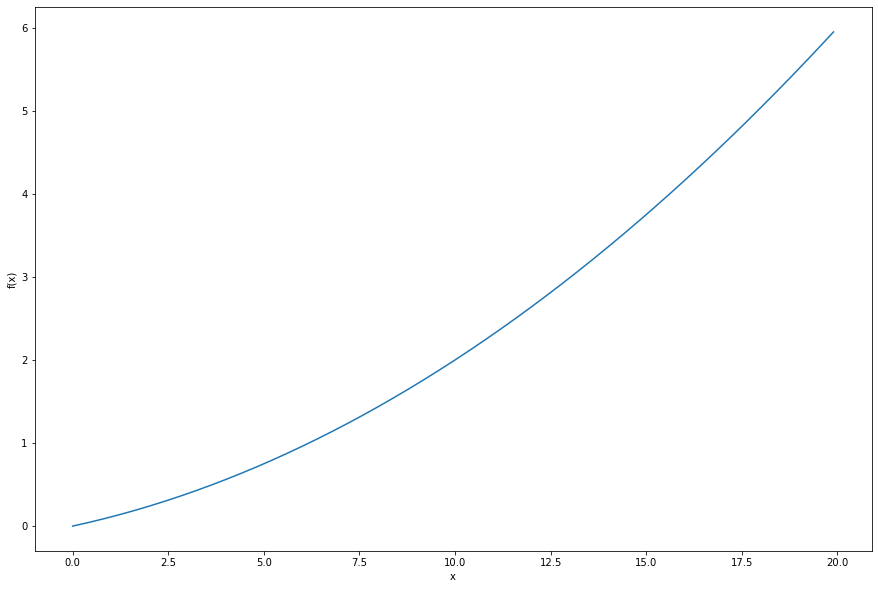

In [25]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.figure(figsize=(15, 10))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [27]:
numerical_differential(function_1, 5)

0.1999999999990898

In [28]:
numerical_differential(function_1, 10)

0.2999999999986347

- 편미분


In [29]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [30]:
# x0 =3, x1 = 4일 때, x0에 대한 편미분
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_differential(function_tmp1, 3.0)

6.00000000000378

In [31]:
# x0 =3, x1 = 4일 때, x1에 대한 편미분
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_differential(function_tmp2, 4.0)

7.999999999999119

## 3. Gradient


- 기울기
- 편미분의 경우 x0와 x1을 변수별로 따로 계산
    - 동시에 계산해보자.

In [39]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for index in range(x.size):
        tmp_val = x[index]
        x[index] = tmp_val + h 
        fxh1 = f(x)
        
        x[index] = tmp_val - h
        fxh2 = f(x)
        
        grad[index] = (fxh1 - fxh2) / (2*h)
        x[index] = tmp_val
        
    return grad

In [40]:
print("(3,4)에서의 기울기:", numerical_gradient(function_2, np.array([3.0, 4.0])))
print("(0,2)에서의 기울기:", numerical_gradient(function_2, np.array([0.0, 2.0])))
print("(3,0)에서의 기울기:", numerical_gradient(function_2, np.array([3.0, 0.0])))

(3,4)에서의 기울기: [6. 8.]
(0,2)에서의 기울기: [0. 4.]
(3,0)에서의 기울기: [6. 0.]


### 경사법: Gradient Descent (경사 하강법)

- 최적: 손실 함수가 최솟값이 될 때의 매개변수
    - 일반적인 문제의 손실 함수는 복잡하고 매개변수 공간이 광대하여 최솟값인지 알아내기 어려움
- 경사법: 기울기를 잘 이용하여 함수의 최솟값을 찾으려는 것
    - 함수가 극솟값, 최솟값, 또는 안장점(saddle point)이 되는 장소에서는 기울기가 0
    - 복잡하고 찌그러진 모양의 함수의 경우, 대부분 평평한 곳으로 파고들면서 고원(plateau)이라 하는 학습이 진행되지 않는 정체기에 빠짐 


In [43]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f, x)
        x -= lr*grad
    return x, np.array(x_history)

In [44]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
lr = 0.1
step_num = 100
x, x_history = gradient_descent(function_2, init_x, lr = lr, step_num = step_num)
print(x)

[-6.11110793e-10  8.14814391e-10]


In [45]:
# 학습률이 너무 클 때: lr = 10.0
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x = init_x, lr = 10.0, step_num = step_num)
print(x)

[-2.58983747e+13 -1.29524862e+12]


In [46]:
# 학습률이 너무 작을 때 : lr = 1e-10
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x = init_x, lr = 1e-10, step_num = step_num)
print(x)

[-2.99999994  3.99999992]


### 신경망에서의 기울기

In [47]:
import sys, os
import numpy as np

In [57]:
def softmax(matrix):
    maximum_of_matrix = np.max(matrix)
    difference_from_maximum = matrix - maximum_of_matrix
    exponential_of_difference = np.exp(difference_from_maximum)
    sum_of_exponential = np.sum(exponential_of_difference)
    y = exponential_of_difference / sum_of_exponential
    return y

def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val
        it.iternext()
        
    return grad

In [51]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [53]:
net = simpleNet()
print(net.W)

[[-0.59055972 -0.40776864 -0.11178089]
 [-0.93033145  0.46961842  0.36751264]]


In [54]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-1.19163414  0.17799539  0.26369284]


In [55]:
np.argmax(p)  # 최대값의 index

2

In [58]:
t = np.array([0, 0, 1])  # 참값이 3번째 index의 값일 때의 loss값 cross entropy로 구함
net.loss(x, t)  

0.7660237298559888

In [62]:
def f(W):  # 손실함수를 최소화하기 위한 w를 구하기 위한 함수
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.06507748  0.25600783 -0.32108531]
 [ 0.09761622  0.38401175 -0.48162797]]


In [61]:
# 함수를 짜지 않고 간단하게 표현도 가능하다.
f = lambda w:net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.06507748  0.25600783 -0.32108531]
 [ 0.09761622  0.38401175 -0.48162797]]


## 4. 학습 알고리즘 구현하기

### 신경망 학습의 절차

- 전제
    - 신경망에는 가중치와 편향이 존재
    - 학습: 가중치와 편향을 훈련 데이터에 맞게 조정하는 것
- 1 단계: 미니 배치
    - 훈련 데이터 중 일부를 무작위로 가져옵니다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표
- 2 단계: 기울기 산출
    - 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구하며, 기울기는 손실 함수의 값을 가장 적게 하는 방향을 제시
- 3 단계: 매개변수 갱신
    - 가중치 매개변수를 기울기 방향으로 아주 조금 갱신
    - 미니배치를 사용한 경사하강법으로 매개변수 갱신: 확률적 경사 하강법(Stochastic gradient decent)
- 반복
    - 1 ~ 3 단계 반복


### 2층 신경망 클래스 구현하기

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

import sys, os
sys.path.append('./mnist_dataset')
import numpy as np
import pickle
from mnist_dataset.mnist import load_mnist
import matplotlib.pylab as plt

In [64]:
def step_function(x):
    return np.array(x>0, dtype=np.int)

def sigmoid(x):
    return 1 / (1+np.exp(-x))
def relu(x):
    return np.maximum(0, x)
def sigmoid_grad(x):
    return (1.0 - sigmoid(x))*sigmoid(x)
def relu_grad(x):
    grad = np.zeros(x)
    grad[x>=0] = 1
    return grad

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T
    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    if t.size == y.size:
        t = t.argmax(axis=1)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t]+ 1e-7)) / batch_size

def softmax_loss(X, t):
    y = softmax(X)
    return cross_entropy_error(y, t)

def numeric_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val - x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2)/(2*h)
        x[idx] = tmp_val
        it.iternext()
    return grad

In [82]:
class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        # print("predict")
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y-t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)
        
        return grads

In [84]:
net = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [85]:
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 50)
(50,)
(50, 10)
(10,)


In [86]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [87]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)
# 수행시간이 오래 걸림
grads = net.numerical_gradient(x, t)

In [88]:
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 50)
(50,)
(50, 10)
(10,)


### 미니배치 학습 구현하기

In [89]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, 
                                                 one_hot_label = True)
train_loss_list = []

In [90]:
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100  # 미니 배치 크기 100
learning_rate = 0.1
iter_per_epoch = max(train_size / batch_size, 1)

In [91]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [92]:
for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 성능 개선판
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # loss 출력
    if i%iter_per_epoch ==0:
        print("loss:", str(loss))
    

loss: 2.2912116020263977
loss: 0.9249961282156743
loss: 0.3996512519873552
loss: 0.36097687214330393
loss: 0.3330927099483578
loss: 0.3211672316782981
loss: 0.3034374031341947
loss: 0.17640923397896136
loss: 0.27703020207320095
loss: 0.21270339805997016
loss: 0.2573343290552395
loss: 0.22814642171470895
loss: 0.13988149842059439
loss: 0.23173244966396006
loss: 0.10937196773511557
loss: 0.1692002019804551
loss: 0.11898749266737252


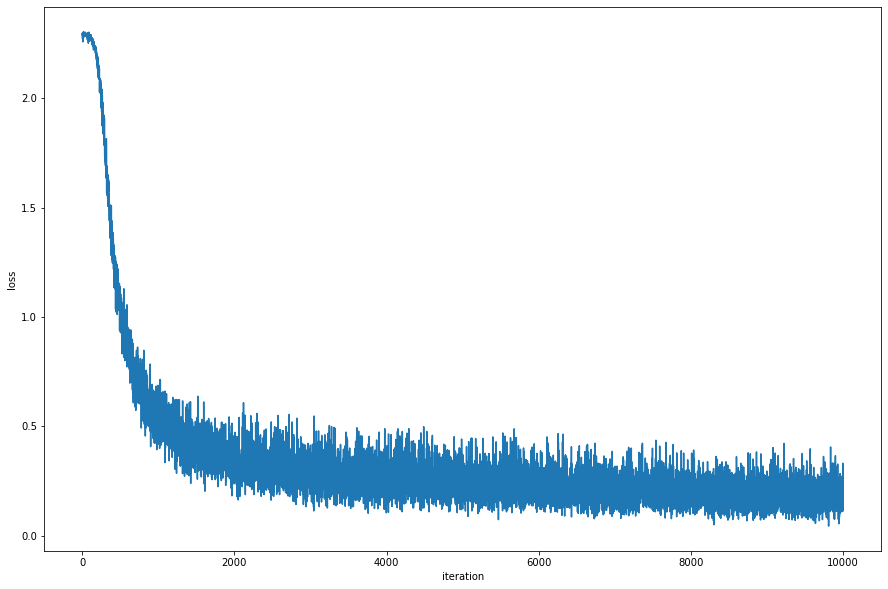

In [93]:
x = np.arange(len(train_loss_list))

plt.figure(figsize=(15, 10))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

### Test Data로 평가하기

In [94]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, 
                                                 one_hot_label = True)
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [95]:
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100  
learning_rate = 0.1
iter_per_epoch = max(train_size / batch_size, 1)

In [96]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [97]:
for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 성능 개선판
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # loss 및 accuracy 출력
    if i%iter_per_epoch ==0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("loss: " + str(loss) + ", train acc: " + str(train_acc))

loss: 2.286233960328914, train acc: 0.09871666666666666
loss: 0.8255484678834079, train acc: 0.7791
loss: 0.6006824082728565, train acc: 0.8771
loss: 0.35795739212949956, train acc: 0.8993166666666667
loss: 0.3732129673222611, train acc: 0.9081833333333333
loss: 0.2967980936608672, train acc: 0.9142166666666667
loss: 0.2480916186560572, train acc: 0.9195666666666666
loss: 0.21460578334036515, train acc: 0.9232666666666667
loss: 0.17825609359421488, train acc: 0.9276166666666666
loss: 0.3354759542687977, train acc: 0.9301833333333334
loss: 0.24519887910077567, train acc: 0.93335
loss: 0.17107895490022462, train acc: 0.93595
loss: 0.3585813307404424, train acc: 0.9381666666666667
loss: 0.2556285376668555, train acc: 0.94085
loss: 0.1796332167765547, train acc: 0.9424333333333333
loss: 0.20831170277089978, train acc: 0.9441833333333334
loss: 0.13521034076475869, train acc: 0.9469


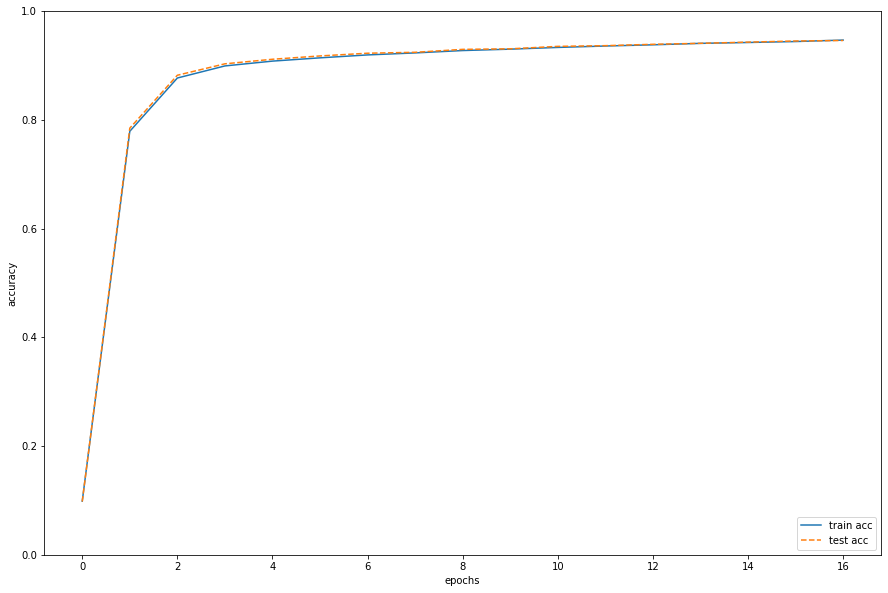

In [99]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))

plt.figure(figsize=(15, 10))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()